In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
# 데이터 파일 불러오기
data1 = pd.read_csv("연령별 거주인구 대비 지역화폐 사용금액 현황.csv")
data2 = pd.read_csv("연령별 지역화폐 사용 빈도 현황.csv")
data3 = pd.read_csv("지역별 지역화폐 결제금액 및 결제변화율.csv", encoding="cp949")
data4 = pd.read_csv("지역화폐가맹점현황.csv", encoding="euc-kr", low_memory=False)
data5 = pd.read_csv('지역화폐연령별성별이용현황.csv', encoding='euc-kr')

In [2]:
data1.info()
data2.info()
data3.info()
data4.info()
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년월      294 non-null    object
 1   시도명     294 non-null    object
 2   시군구명    294 non-null    object
 3   총거주인구수  294 non-null    int64 
 4   0~9세    294 non-null    int64 
 5   10~19세  294 non-null    int64 
 6   20~29세  294 non-null    int64 
 7   30~39세  294 non-null    int64 
 8   40~49세  294 non-null    int64 
 9   50~59세  294 non-null    int64 
 10  60~69세  294 non-null    int64 
 11  70~79세  294 non-null    int64 
 12  80~89세  294 non-null    int64 
 13  90~99세  294 non-null    int64 
 14  총결제금액   294 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 34.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년월      2274 non-null   object
 1   시도명     2274

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'  # Windows: 'Malgun Gothic', Mac: 'AppleGothic', Linux: 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

In [4]:
data5['결제취소건수'] = data5['결제취소건수'].fillna(0)  # 결제취소건수 결측치는 0으로 대체
data5['결제취소금액'] = data5['결제취소금액'].fillna(0)  # 결제취소금액 결측치는 0으로 대체
data5['성별'] = data5['성별'].fillna('기타')  # 성별 결측치는 '기타'로 대체

In [5]:
print(data5.describe())

         기준연도         연령대          결제건수          결제금액        결제취소건수  \
count   496.0  496.000000  4.960000e+02  4.960000e+02    496.000000   
mean   2023.0   45.000000  3.743738e+05  9.374921e+09   2550.243952   
std       0.0   22.936011  4.799563e+05  1.372474e+10   3256.306113   
min    2023.0   10.000000  2.117000e+03  5.061636e+07     11.000000   
25%    2023.0   27.500000  5.665850e+04  1.321169e+09    348.750000   
50%    2023.0   45.000000  1.729185e+05  4.120928e+09   1328.000000   
75%    2023.0   62.500000  5.339530e+05  1.208801e+10   3533.250000   
max    2023.0   80.000000  3.326977e+06  1.020000e+11  24670.000000   

             결제취소금액      1회평균결제금액  
count  4.960000e+02    496.000000  
mean   1.209262e+08  23901.120968  
std    1.742901e+08   5403.407552  
min    2.731010e+05  14408.000000  
25%    1.598314e+07  19617.750000  
50%    5.814324e+07  23646.000000  
75%    1.476938e+08  27140.500000  
max    1.347633e+09  50951.000000  


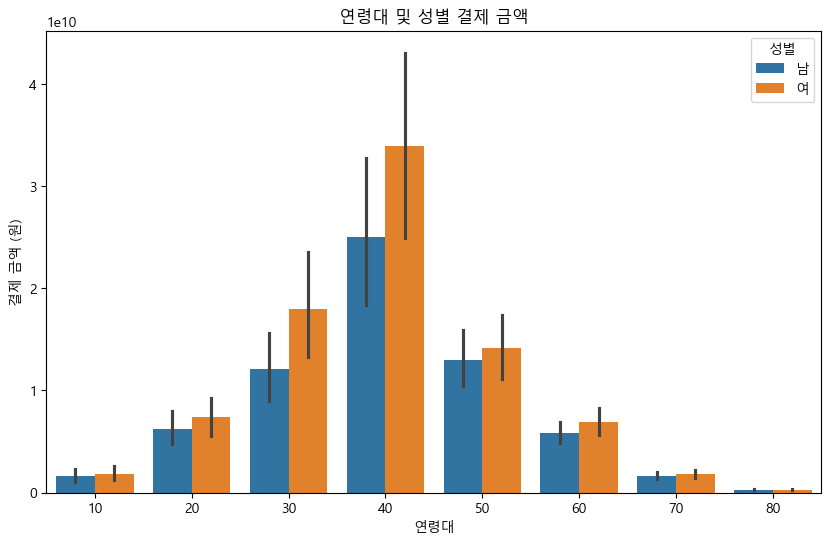

In [7]:
if platform.system() == "Windows":
    plt.rc("font", family="Malgun Gothic")  # Windows의 맑은 고딕
elif platform.system() == "Darwin":
    plt.rc("font", family="AppleGothic")  # macOS의 애플 고딕
else:
    rc('font', family='NanumGothic')  # 리눅스의 나눔 고딕

plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용 시 마이너스 부호 깨짐 방지

plt.figure(figsize=(10, 6))
sns.barplot(data5, x='연령대', y='결제금액', hue='성별')
plt.title('연령대 및 성별 결제 금액')
plt.xlabel('연령대')
plt.ylabel('결제 금액 (원)')
plt.legend(title='성별')
plt.show()

In [13]:
a=data5.query('시군명=="가평군"&기준연도==2023')

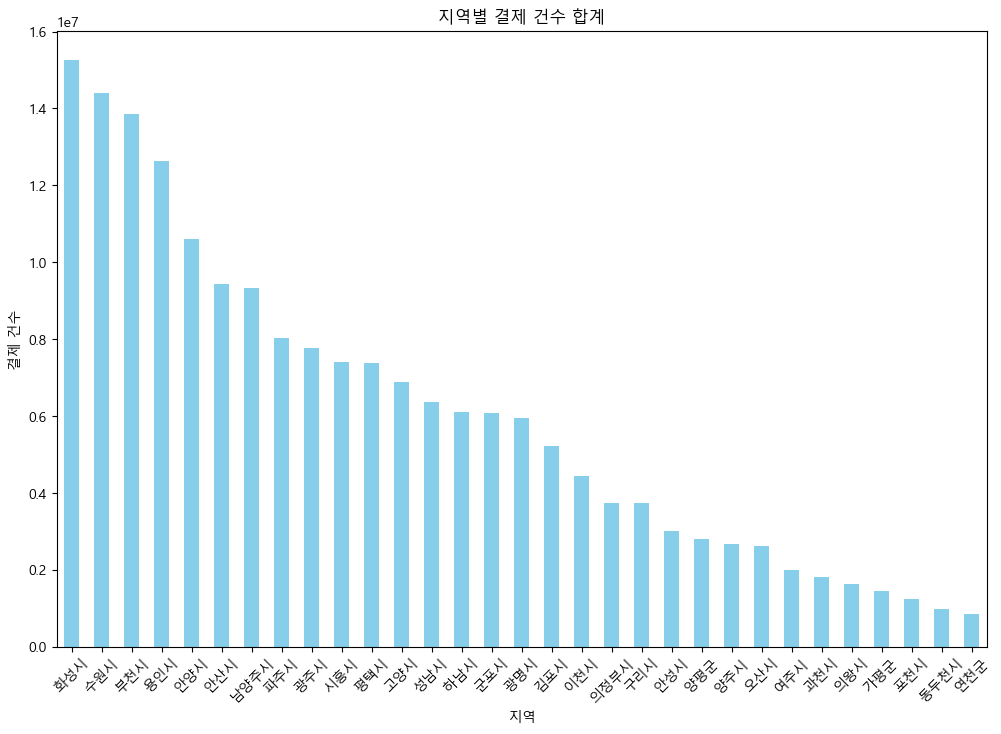

In [17]:
region_summary = data5.groupby('시군명')['결제건수'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
region_summary.plot(kind='bar', color='skyblue')
plt.title('지역별 결제 건수 합계')
plt.xlabel('지역')
plt.ylabel('결제 건수')
plt.xticks(rotation=45)
plt.show()

In [19]:
data5['취소율'] = (data5['결제취소건수'] / data5['결제건수']) * 100

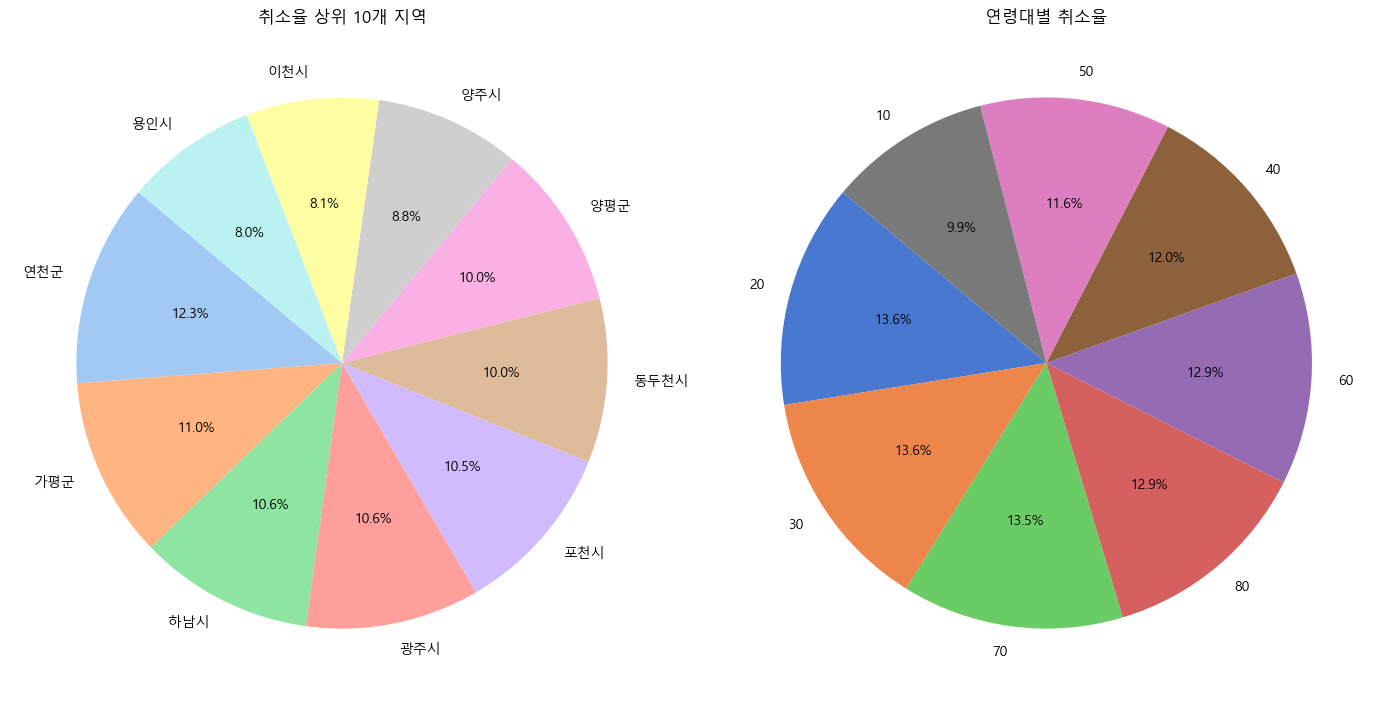

In [41]:
# 상위 10개 지역별 취소율 집계
high_cancellation = data5.groupby('시군명')['취소율'].mean().sort_values(ascending=False).head(10)

# 연령대별 취소율 집계
age_cancellation = data5.groupby('연령대')['취소율'].mean().sort_values(ascending=False)

# 원형 그래프 그리기 (subplot 활용)
plt.figure(figsize=(14, 7))

# 첫 번째 그래프: 취소율 상위 10개 지역
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 위치
plt.pie(high_cancellation, labels=high_cancellation.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('취소율 상위 10개 지역')

# 두 번째 그래프: 연령대별 취소율
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 위치
plt.pie(age_cancellation, labels=age_cancellation.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('연령대별 취소율')

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()

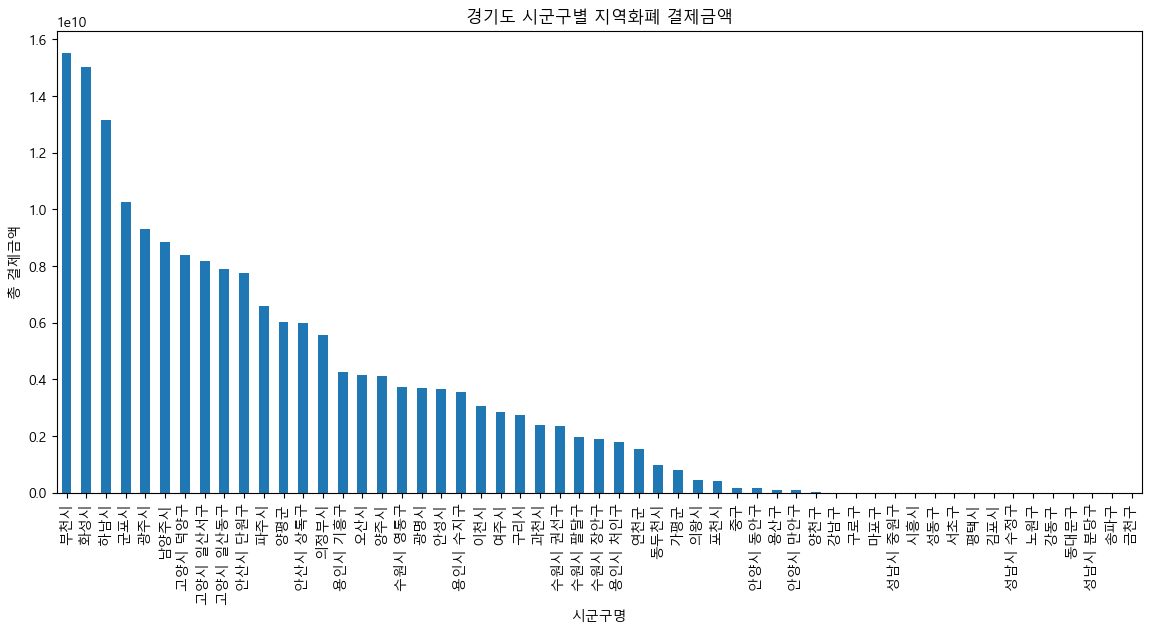

In [23]:
# 지역별 결제금액 분석
region_payment = data3.groupby('시군구명')['결제금액'].sum().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(14, 6))
region_payment.plot(kind='bar')
plt.title('경기도 시군구별 지역화폐 결제금액')
plt.xlabel('시군구명')
plt.ylabel('총 결제금액')
plt.xticks(rotation=90)
plt.show()

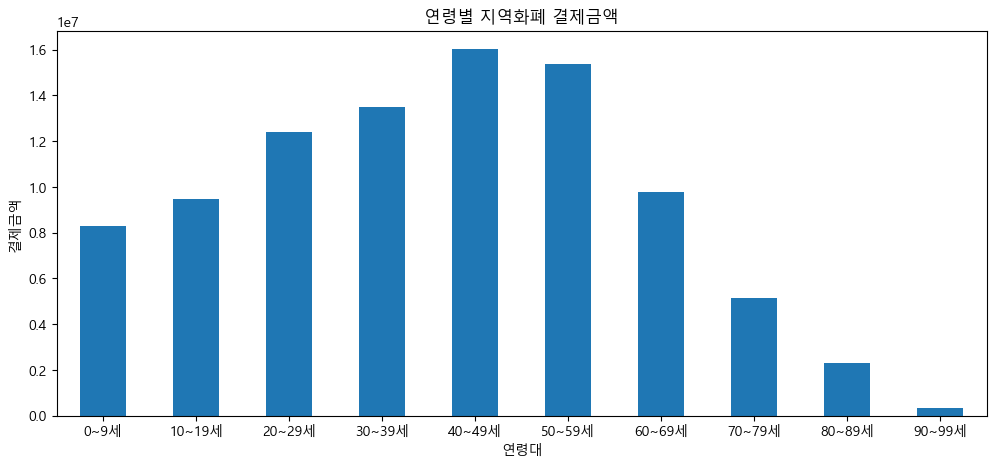

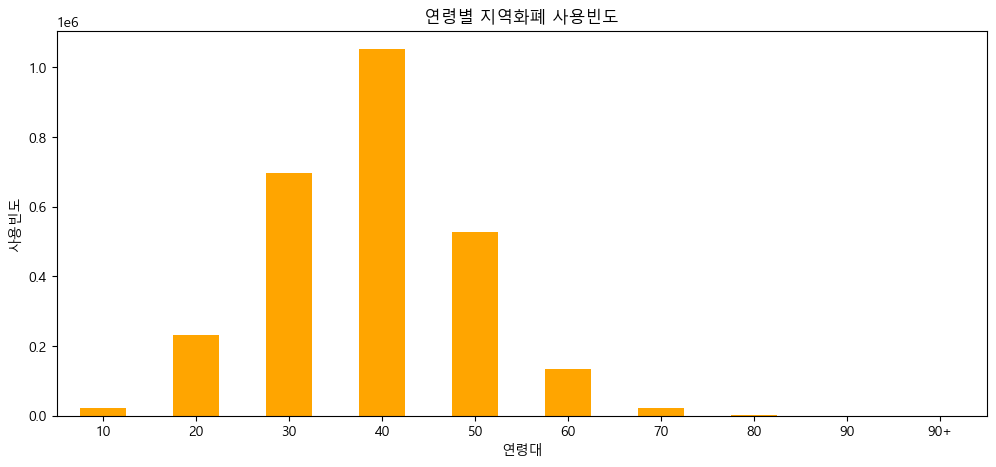

In [27]:
# 연령대별 결제금액 및 사용빈도 분석
# 결제금액
age_payment = data1[['0~9세', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세']].sum()
plt.figure(figsize=(12, 5))
age_payment.plot(kind='bar')
plt.title('연령별 지역화폐 결제금액')
plt.xlabel('연령대')
plt.ylabel('결제금액')
plt.xticks(rotation=0)
plt.show()

# 사용빈도
age_frequency = data2.groupby('연령대코드')['사용빈도'].sum()
plt.figure(figsize=(12, 5))
age_frequency.plot(kind='bar', color='orange')
plt.title('연령별 지역화폐 사용빈도')
plt.xlabel('연령대')
plt.ylabel('사용빈도')
plt.xticks(rotation=0)
plt.show()

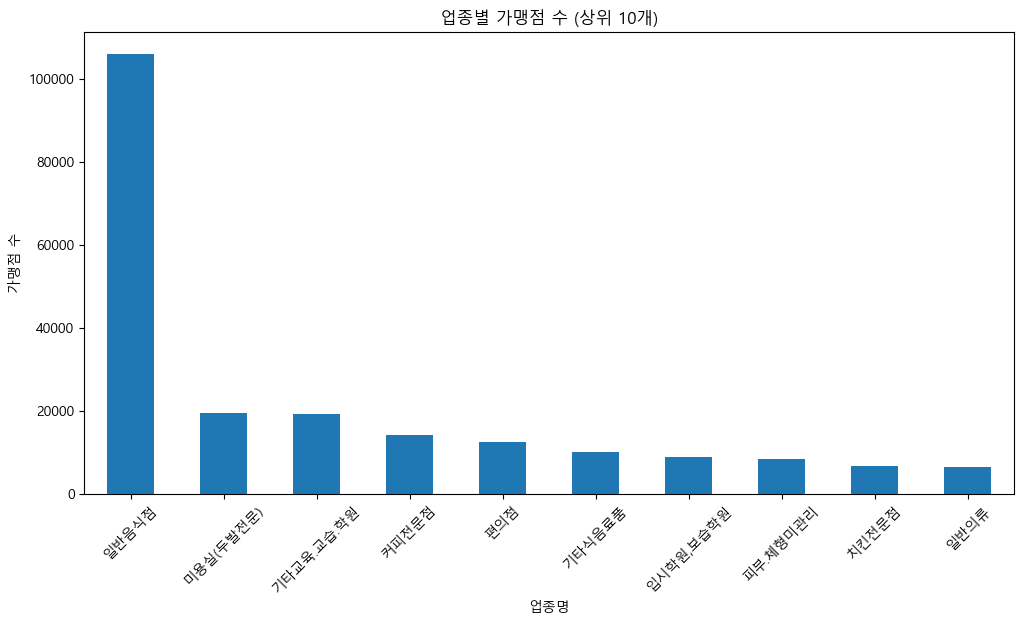

업종별 가맹점 비율 (%)
 업종명(종목명)
일반음식점         25.320419
미용실(두발전문)      4.654101
기타교육.교습.학원     4.551175
커피전문점          3.349739
편의점            2.961440
기타식음료품         2.363946
입시학원,보습학원      2.108901
피부.체형미관리       1.978512
치킨전문점          1.568004
일반의류           1.518571
Name: count, dtype: float64


In [29]:
# 업종별 가맹점 수 분석
store_summary = data4['업종명(종목명)'].value_counts()
store_ratio = (store_summary / store_summary.sum()) * 100

# Top 10 업종 시각화
top_stores = store_summary.head(10)
plt.figure(figsize=(12, 6))
top_stores.plot(kind='bar')
plt.title('업종별 가맹점 수 (상위 10개)')
plt.xlabel('업종명')
plt.ylabel('가맹점 수')
plt.xticks(rotation=45)
plt.show()

# 업종별 비율 출력
print('업종별 가맹점 비율 (%)\n', store_ratio.head(10))

시군구별 가맹점 수와 결제금액의 상관계수: 0.47


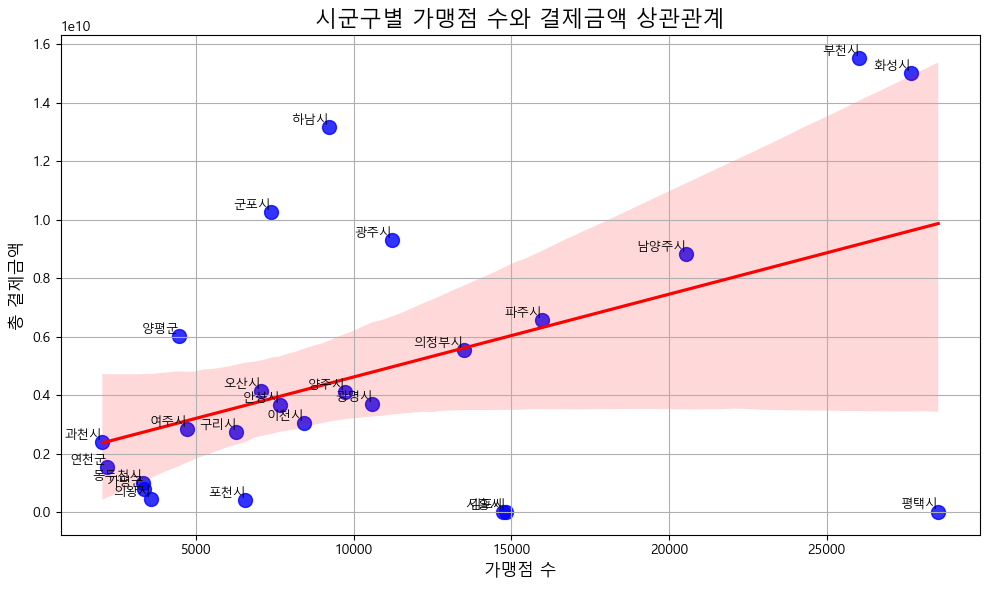

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
matplotlib.rcParams['axes.unicode_minus'] = False    # 마이너스 깨짐 방지

# 1. 시군구별 결제금액 집계 (data3 사용)
region_payment = data3.groupby('시군구명')['결제금액'].sum().reset_index()
region_payment.columns = ['시군구명', '총결제금액']

# 2. 시군구별 가맹점 수 집계 (data4 사용)
region_store_count = data4['시군명'].value_counts().reset_index()
region_store_count.columns = ['시군구명', '가맹점수']

# 3. 데이터 병합 (시군구명 기준)
merged_data = pd.merge(region_store_count, region_payment, on='시군구명', how='inner')

# 4. 상관관계 계산
correlation = merged_data['가맹점수'].corr(merged_data['총결제금액'])
print(f"시군구별 가맹점 수와 결제금액의 상관계수: {correlation:.2f}")

# 5. 상관관계 시각화 - Scatter Plot + 회귀선
plt.figure(figsize=(10, 6))
sns.regplot(x='가맹점수', y='총결제금액', data=merged_data, scatter_kws={'s': 100, 'color': 'blue'}, line_kws={"color": "red"})
plt.title('시군구별 가맹점 수와 결제금액 상관관계', fontsize=16)
plt.xlabel('가맹점 수', fontsize=12)
plt.ylabel('총 결제금액', fontsize=12)

# 각 점에 시군구명 라벨 추가
for i in range(len(merged_data)):
    plt.text(merged_data['가맹점수'][i], merged_data['총결제금액'][i], merged_data['시군구명'][i], 
             fontsize=9, ha='right', va='bottom')

plt.grid(True)
plt.tight_layout()
plt.show()

### 결제금액과 연령대 결합 분석

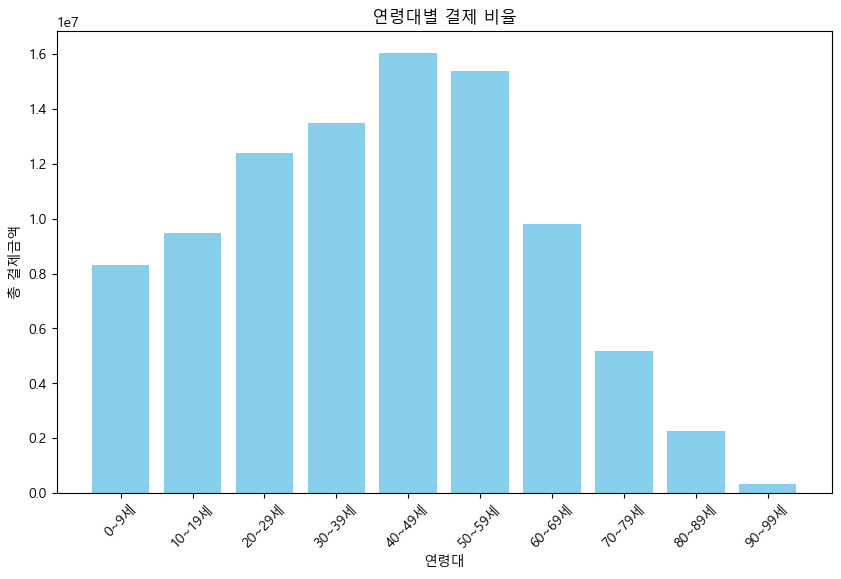

In [33]:
# 연령대별 결제 비율 시각화 (data1 사용)
df_age_payment = data1  # 변수명을 맞게 할당
age_columns = ['0~9세', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세']

# 연령대별 결제금액 합계
age_summary = df_age_payment[age_columns].sum().reset_index()
age_summary.columns = ['연령대', '총결제금액']

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(age_summary['연령대'], age_summary['총결제금액'], color='skyblue')
plt.title('연령대별 결제 비율')
plt.xlabel('연령대')
plt.ylabel('총 결제금액')
plt.xticks(rotation=45)
plt.show()

### 결론 도출


1. **결제금액 상위 지역**:
   - 특정 지역(부천시, 화성시 등)의 결제금액이 집중되어 있습니다.
2. **연령대별 결제 비율**:
   - 40~50대 연령층이 전체 결제금액의 대부분을 차지하고 있습니다.
3. **가맹점 현황**:
   - 활성 가맹점 비율이 높으나 일부 지역에서는 휴폐업률이 높아 개선이 필요합니다.

### 제안 사항
- 결제금액이 낮은 지역과 고령층을 대상으로 한 프로모션 강화
- 휴폐업률이 높은 지역에 대한 가맹점 지원 프로그램 마련
